In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [14]:
data = df[['Age', 'Spending_Score']]

In [15]:
data.head()

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


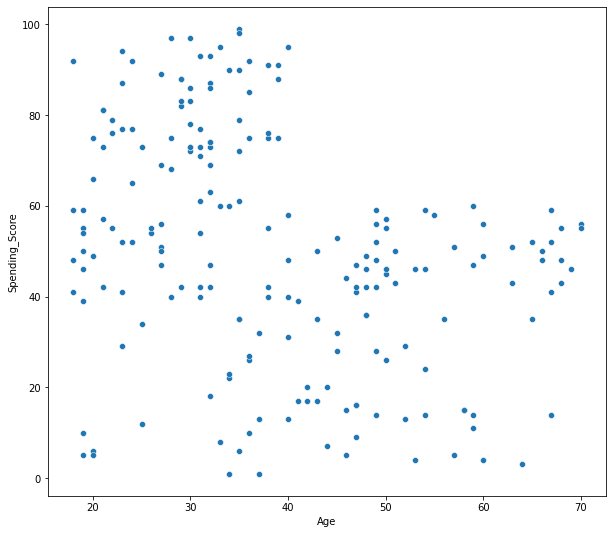

In [17]:
plt.figure(figsize=(10,9))
sns.scatterplot(data['Age'], data['Spending_Score'])

In [19]:
from sklearn.cluster import KMeans

In [52]:
kmean = KMeans(n_clusters=5)

In [53]:
kmean = KMeans(n_clusters=5)
kmean.fit(data)
y_pred = kmean.predict(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
y_pred = kmean.predict(data)

In [55]:
y_pred.shape

(200,)

In [56]:
y_pred

array([2, 1, 4, 1, 2, 1, 4, 1, 0, 1, 0, 1, 0, 1, 4, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 4, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 4, 1, 0, 1, 4, 1, 0, 1, 2, 1, 4, 1, 3, 1, 4, 1, 0, 1, 0, 1,
       0, 1, 4, 1, 4, 1, 3, 1, 4, 1, 0, 1, 0, 1, 4, 2, 4, 1, 4, 1, 0, 1,
       0, 1, 0, 1, 4, 1, 0, 1, 2, 1, 0, 1, 4, 1, 4, 1, 4, 1, 0, 1, 0, 1,
       4, 1], dtype=int32)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


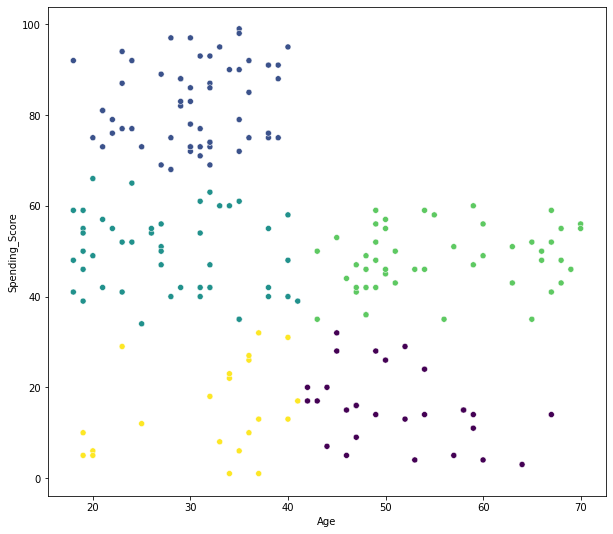

In [57]:
plt.figure(figsize=(10,9))
sns.scatterplot(data['Age'], data['Spending_Score'], c=y_pred)

In [41]:
from tqdm import tqdm

In [45]:
import time

In [50]:
inertias = []
for num in tqdm(range(1,21)):
  kmean = KMeans(n_clusters=num)
  kmean.fit(data)
  inertias.append(kmean.inertia_)

100%|██████████| 20/20 [00:01<00:00, 14.60it/s]


**Elbow Method**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Finding optimal number of clusters')

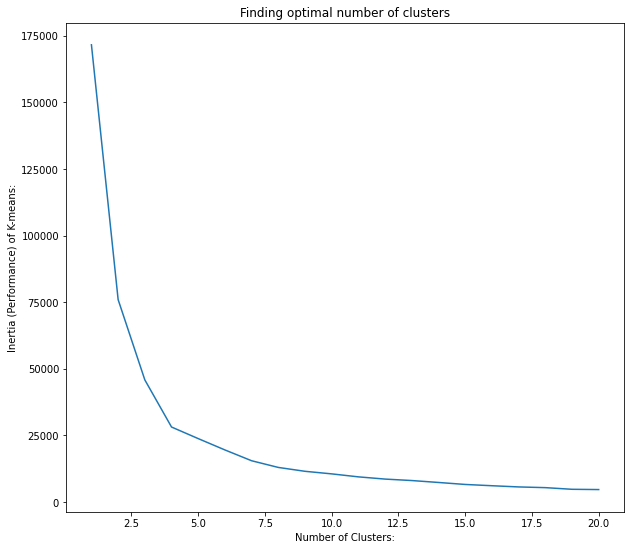

In [40]:
plt.figure(figsize=(10,9))
sns.lineplot(range(1,21), inertias)
plt.xlabel('Number of Clusters:')
plt.ylabel('Inertia (Performance) of K-means:')
plt.title('Finding optimal number of clusters')

In [74]:
kmean = KMeans(n_clusters=4)
kmean.fit(data)
y_pred = kmean.predict(data)

In [75]:
centroids = kmean.cluster_centers_

In [76]:
centroids

array([[30.1754386 , 82.35087719],
       [55.70833333, 48.22916667],
       [43.29166667, 15.02083333],
       [27.61702128, 49.14893617]])

In [77]:
centroids[:,0].astype(int)

array([30, 55, 43, 27])

In [78]:
centroids[:,1]

array([82.35087719, 48.22916667, 15.02083333, 49.14893617])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


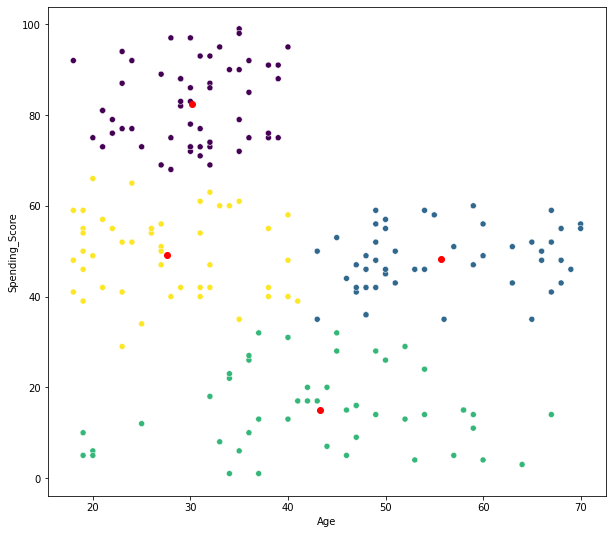

In [79]:
plt.figure(figsize=(10,9))
sns.scatterplot(data['Age'], data['Spending_Score'], c=y_pred)
plt.scatter(centroids[:,0], centroids[:,1], c='red')